In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Primeiramente, vamos definir as funções que serão utilizadas, bem como uma função para esboçar os gráficos das funções

In [2]:
# Função responsável por calcular os valores de p e n.
def vetor_possibilidades(coeficientes):
  v = 0
  coefic = [a for a in coeficientes if a != 0]
  tamanho = len(coefic)
  for i in range(tamanho-1):
    if coefic[i]*coefic[i+1]<0:
      v += 1
  return [i for i in range(v+1) if (v-i)%2==0]

In [ ]:
# Função responsável por calcular o resultado dos coeficientes ao substituir x por -1.
def f_inversa(coeficientes):
  coeficientes = np.array(coeficientes)[::-1]
  coefic = [(-1)**i * coeficientes[i] for i in range(len(coeficientes))]
  return np.array(coefic)[::-1]

In [4]:
# A função que realiza o método de Descartes propriamente dito.
# OBS: a ordem dos coeficientes será decrescente em todas as funções: [an, an-1, ..., a1, a0]
def regradesinal(coeficientes):
  grau = len(coeficientes)-1

  p = vetor_possibilidades(coeficientes)

  inv_coefic = f_inversa(coeficientes)
  
  n = vetor_possibilidades(inv_coefic)

  possibilidades = []
  for b in p:
    for a in n:
      possibilidade = [b,a]
      possibilidade.append(grau-a-b)
      possibilidades.append(possibilidade)
  return pd.DataFrame(possibilidades, columns=['Positivas', 'Negativas', 'Complexas conjugadas'])

In [5]:
# Função para calcular o raio da circunferência na qual encontram-se todas as raízes
def calcula_r(coeficientes):
  an = coeficientes[0]
  coefic = np.array(coeficientes)[1:]
  candidatos = [ai/an for ai in coefic]
  r = 1 + max(candidatos)
  return r

In [6]:
# Função para encontrar os b's e c's para os quais |delta_r/r| e |delta_s/s| está dentro da tolerância desejada.
def encontra_deltas(coefic, r, s, erromax, grau):
  b = [coefic[0],coefic[1] + r*coefic[0]]
  for i in range(2, grau+1):
    b.append(coefic[i] + r*b[i-1] + s*b[i-2])
  c = [b[0], b[1] + r*b[0]]
  for i in range(2, grau):
    c.append(b[i] + r*c[i-1] + s*c[i-2])
  c.append(0)
  b_inv = np.array(b)[::-1]
  c_inv = np.array(c)[::-1]
  if c_inv[3] != 0:
    delta_r = (-b_inv[0] + (c_inv[2]*b_inv[1])/c_inv[3])/(c_inv[1]-(c_inv[2]**2/c_inv[3]))
    delta_s = (-b_inv[1] - c_inv[2]*delta_r)/c_inv[3]
  else:
    delta_r = -b_inv[1]/c_inv[2]
    delta_s = (-b_inv[0] - c_inv[1]*delta_r)/c_inv[2]
  # Se tanto c2 quanto c3 forem iguais a 0, o sistema é indeterminado.
  r += delta_r
  s += delta_s
  if abs(delta_r/r) <= erromax and abs(delta_s/s) <= erromax:
    return r, s, b[0:len(b)-2]
  return encontra_deltas(coefic, r, s, erromax, grau)

In [7]:
# Função que realiza o método de Bairstow propriamente dito.
def bairstow(coefic, r, s, erromax):
  x = []
  grau = len(coefic)-1
  while(grau>2):
    r, s, coefic = encontra_deltas(coefic, r, s, erromax, grau)
    delta = r**2 + 4*s
    if delta>=0:
      raiz_delta = np.sqrt(delta)
    else:
      raiz_delta = complex(0,np.sqrt(-1*delta))
    x.append((r + raiz_delta)/2)
    x.append((r - raiz_delta)/2)
    grau = len(coefic)-1
  if grau == 2:
    delta = coefic[1]**2 - 4*coefic[0]*coefic[2]
    if delta >= 0:
      raiz_delta = np.sqrt(delta)
    else:
      raiz_delta = complex(0,np.sqrt(-1*delta))
    x.append((-coefic[1] + raiz_delta)/2*coefic[0])
    x.append((-coefic[1] - raiz_delta)/2*coefic[0])
  else:
    x.append(-coefic[1]/coefic[0])
  return x

In [8]:
def plotagrafico(f, xmin, xmax, niter):
  x = np.linspace(xmin,xmax,niter)
  y = f(x)
  plt.grid()
  plt.plot(x, y)

Escolhemos o método de Bairstow pois ele é o mais eficiente em encontrar todas as raízes de uma função.

Com isso, estamos prontos para iniciar.

**ITEM A**

In [9]:
def fa(x):
  return x**4 -7.5*x**3 + 14.5*x**2 + 3*x - 20

In [10]:
coefic_a = [1, -7.5, 14.5, 3, -20]

In [11]:
regradesinal(coefic_a)

,Positivas,Negativas,Complexas conjugadas
0,1,1,2
1,3,1,0


In [12]:
calcula_r(coefic_a)

15.5

In [13]:
raizes_a = bairstow(coefic_a, 1, 1, 0.0001)
raizes_a

[1.9999999939497293,
 -1.0000000000820626,
 3.999980480541373,
 2.5000733018205326]

In [14]:
abs(np.array(raizes_a))

array([1.99999999, 1.        , 3.99998048, 2.5000733 ])

Segundo o método de Bairstow, temos 3 raízes positivas e 1 negativa, sendo essa a segunda possibilidade identificada pela regra de Descartes. Além disso, o módulo de todas as raízes encontra-se dentro da circunferência de raio r que encontramos. Podemos observar a acertividade do método através de uma visualização gráfica.

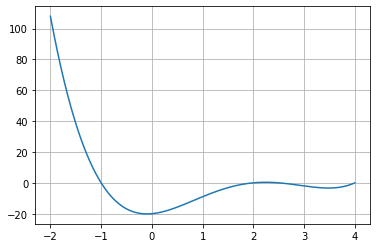

In [15]:
plotagrafico(fa, -2, 4, 1000)

Com um zoom maior nas raízes positivas...

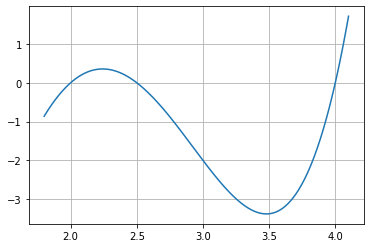

In [16]:
plotagrafico(fa, 1.8, 4.1, 1000)

**ITEM B**

In [17]:
def fb(x):
  return x**5 - 5*x**4 + x**3 - 6*x**2 - 7*x + 10 

In [18]:
coefic_b = [1, -5, 1, -6, -7, 10]

In [19]:
regradesinal(coefic_b)

,Positivas,Negativas,Complexas conjugadas
0,0,1,4
1,2,1,2
2,4,1,0


In [20]:
calcula_r(coefic_b)

11.0

In [21]:
raizes_b = bairstow(coefic_b, 1, 1, 0.0001)
raizes_b

[0.7710140905449575,
 -1.1040443698067357,
 (0.12929787997421885+1.5160306168358473j),
 (0.12929787997421885-1.5160306168358473j),
 5.074434437283866]

In [22]:
abs(np.array(raizes_b))

array([0.77101409, 1.10404437, 1.52153435, 1.52153435, 5.07443444])

Encontramos 2 raízes positivas, 1 raiz negativa e 2 raízes complexas conjugadas, o que remete à segunda possibilidade encontrada pela regra de sinal de Descartes. Todas as raízes possuem módulo dentro do encontrado pelo método calcula_r. Analisemos o gráfico:

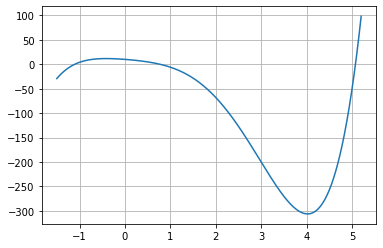

In [23]:
plotagrafico(fb, -1.5, 5.2, 1000)

Podemos perceber que a curva cortou o eixo das abscissas 3 vezes (já que as outras duas raízes são complexas), nos pontos encontrados pelo método de Bairstow.

**ITEM C**

In [24]:
def fc(x):
  return x**3 + x**2  - 3*x - 5

In [25]:
coefic_c = [1,1,-3,-5]

In [26]:
regradesinal(coefic_c)

,Positivas,Negativas,Complexas conjugadas
0,1,0,2
1,1,2,0


In [27]:
calcula_r(coefic_c)

2.0

In [28]:
raizes_c = bairstow(coefic_c, 1, 1, 0.0001)
raizes_c

[(-1.4598197828933324+0.688172819710032j),
 (-1.4598197828933324-0.688172819710032j),
 1.9196419921388879]

In [29]:
abs(np.array(raizes_c))

array([1.61389455, 1.61389455, 1.91964199])

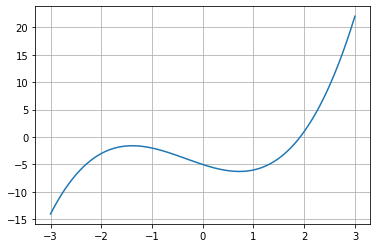

In [30]:
plotagrafico(fc, -3, 3, 1000)

O método de Bairstow encontrou 2 raízes complexas conjugadas e 1 raiz positiva, conforme indicado pela primeira possibilidade da regra de sinal. Todas as raízes com módulos dentro da região esperada.

**ITEM D**

In [31]:
def fd(x):
  return x**3 - 0.5*x**2 + 4*x -3

In [32]:
coefic_d = [1,-0.5,4,-3]

In [33]:
regradesinal(coefic_d)

,Positivas,Negativas,Complexas conjugadas
0,1,0,2
1,3,0,0


In [34]:
calcula_r(coefic_d)

5.0

In [35]:
raizes_d = bairstow(coefic_d, 1, 1, 0.0001)
raizes_d

[(-0.11061522634781971+2.0364975843952635j),
 (-0.11061522634781971-2.0364975843952635j),
 0.7212305781381501]

In [36]:
abs(np.array(raizes_d))

array([2.03949948, 2.03949948, 0.72123058])

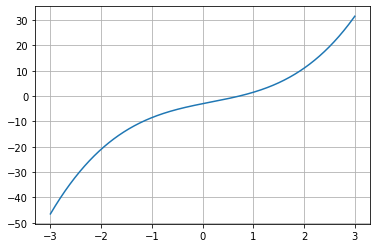

In [37]:
plotagrafico(fd, -3, 3, 1000)

Encontramos 1 raiz positiva e 2 complexas conjugadas, conforme a primeira possibilidade indicada pela regra de Descartes, todas as raízes com módulo dentro do esperado.

**ITEM E**

In [38]:
def fe(x):
  return 2*x**4 + 6*x**2 + 10

In [39]:
coefic_e = [2,0,6,0,10]

In [40]:
regradesinal(coefic_e)

,Positivas,Negativas,Complexas conjugadas
0,0,0,4


In [41]:
calcula_r(coefic_e)

6.0

In [42]:
raizes_e = bairstow(coefic_e, 1, 1, 0.0001)
raizes_e

[(0.6066580492747911+1.3667603991738622j),
 (0.6066580492747911-1.3667603991738622j),
 (-2.4266322180070996+5.467041618842865j),
 (-2.4266322180070996-5.467041618842865j)]

In [43]:
abs(np.array(raizes_e))

array([1.49534878, 1.49534878, 5.98139515, 5.98139515])

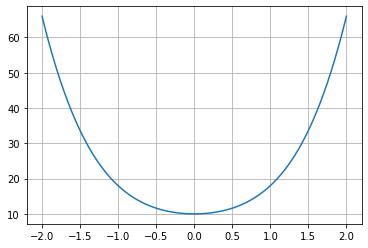

In [44]:
plotagrafico(fe, -2, 2, 1000)

Como podemos perceber, o método de Bairstow encontrou 2 pares complexos conjugados, de modo que, como observamos no gráfico, a curva representativa de fe(x) não corta o eixo X em nenhum ponto. Todas a raízes complexas possuem módulo dentro do esperado.

**ITEM F**

In [45]:
def ff(x):
  return x**4 - 2*x**3 + 6*x**2 - 8*x + 8

In [46]:
coefic_f = [1,-2,6,-8,8]

In [47]:
regradesinal(coefic_f)

,Positivas,Negativas,Complexas conjugadas
0,0,0,4
1,2,0,2
2,4,0,0


In [48]:
calcula_r(coefic_f)

9.0

In [49]:
raizes_f = bairstow(coefic_f, 1, 1, 0.0001)
raizes_f

[(0.9999999999979512+1.000000000000811j),
 (0.9999999999979512-1.000000000000811j),
 (1.06248732367753e-06+2.0000011549190937j),
 (1.06248732367753e-06-2.0000011549190937j)]

In [50]:
abs(np.array(raizes_f))

array([1.41421356, 1.41421356, 2.00000115, 2.00000115])

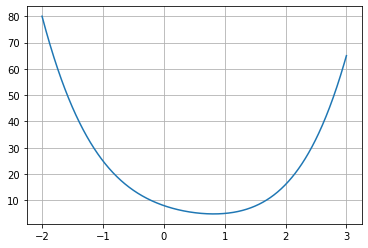

In [51]:
plotagrafico(ff, -2, 3, 1000)

As raízes da função analisada são 2 pares complexos conjugados, confome indicado na primeira possibilidade da regra de sinal e comprovado pelo gráfico acima. Todas as raízes possuem módulo dentro do esperado.